In [1]:
import numpy as np  
import pandas as pd 
from PIL import Image #Converte imagens em arrays

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df_can = pd.read_excel(
    URL,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
# Limpeza para remover colunas desnecessárias (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Renomeando para que as colunas façam sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Para manter a consistência, transformar todas as labels das colunas em string
df_can.columns = list(map(str, df_can.columns))

# Colocar o nome dos paises como index
df_can.set_index('Country', inplace=True)

# Adicona a coluna Total
df_can['Total'] = df_can.sum(axis=1)

# Anos que usaremos, útil para gerar gráficos depois
years = list(map(str, range(1980, 2014)))
print('Dimensões:', df_can.shape)

Dimensões: (195, 38)


C:\Users\emidi\AppData\Local\Temp\ipykernel_14872\1104207953.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

In [5]:
# Waffle Charts
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

In [6]:
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [7]:
# Computa a proporção de cada categoria
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

pd.DataFrame({"Proporção da categoria": category_proportions})

,Proporção da categoria
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [8]:
width = 40
height = 10

total_num_tiles = width * height

In [9]:
# Computa o número de quadrados para cada categoria
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

In [11]:
# Inicializa o waffle chart como uma matriz vazia
waffle_chart = np.zeros((height, width), dtype=np.uint)

# Define os indices para fazer loop pelo waffle chart
category_index = 0
title_index = 0

# Popula o waffle chart
for col in range(width):
    for row in range(height):
        title_index+=1
        if title_index > sum(tiles_per_category[0:category_index]):
            category_index+=1
            
        waffle_chart[row, col] = category_index

In [12]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

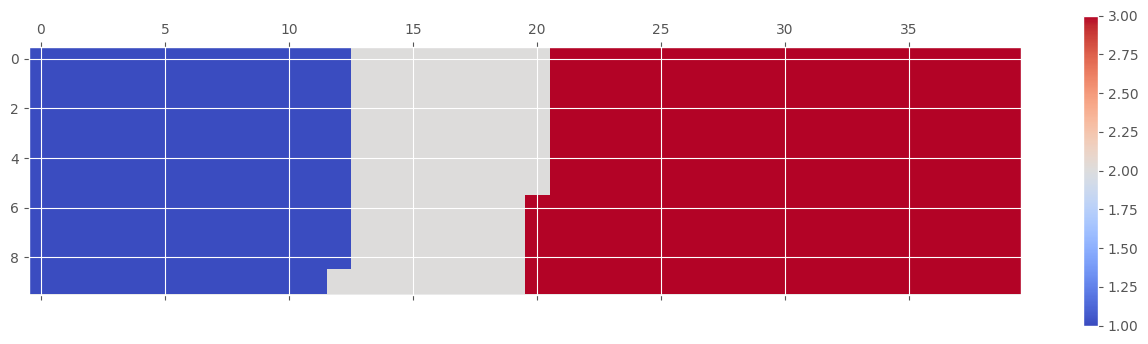

In [13]:
# Instanciando um novo objeto figura
fig = plt.figure()

# Usando matshow para mostrar o waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

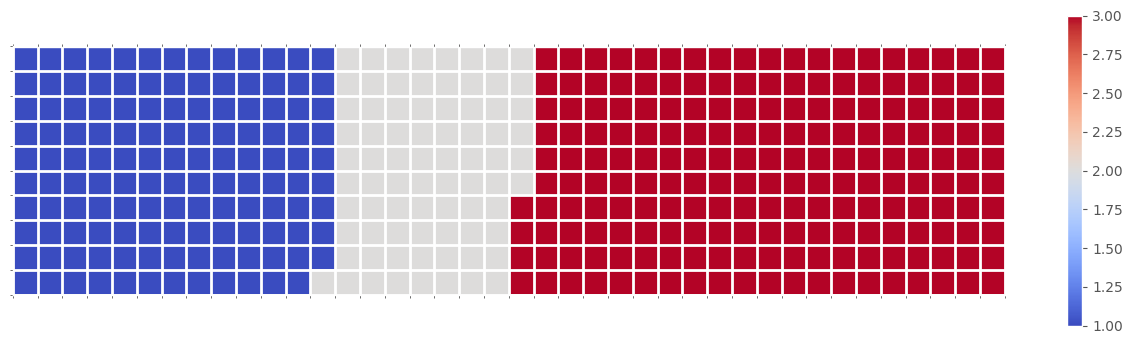

In [14]:
fig = plt.figure()

# Usando matshow para mostrar o waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#Adiciona gridlines
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 640x480 with 0 Axes>

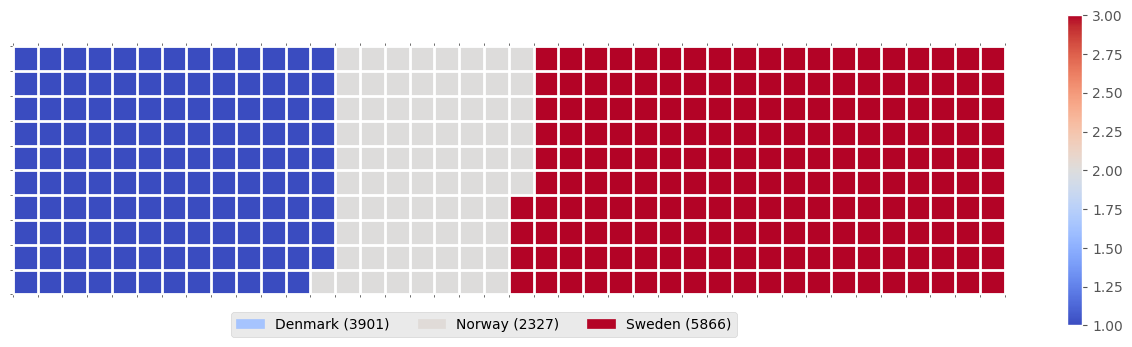

In [16]:
fig = plt.figure()

# Usando matshow para mostrar o waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#Adiciona gridlines
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

# Computa o somatório acumulativo das categorias individuais para corresponder ao esquema de cores do chart e legenda
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) -1]

#Cria uma legenda
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
#Adiciona legenda ao grafico
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

In [17]:
# Transformando em uma função
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # Computa a proporção de cada categoria em relação ao total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # Computa o número total de quadrados
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # Computa o número de quadrados para cada categorial
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # Printa o número de quadrados por categoria
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # Inicializa o waffle chart como uma matriz vaia
    waffle_chart = np.zeros((height, width))

    # Define os indices para ficar em loop pelo waffle chart
    category_index = 0
    tile_index = 0

    # Popula o waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # Se o número de quadrados populados pela categoria
            # é igual ao número correspondente de quadrados...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...vá para a próxima categoria
                category_index += 1       
            
            # Seta o valor da classe para inteiro, que aumenta com a classe
            waffle_chart[row, col] = category_index
    
    # Instância o objeto figura
    fig = plt.figure()

    # Usa matshow para mostrar o waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # Pega o axis
    ax = plt.gca()

    # Seta os minorticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # Adiciona gridlines baseado nos ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # Computa o somatório acumulativo das categorias individuais para corresponder ao esquema de cores do chart e legenda
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # Cria uma legenda
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # Adiciona a legenda para o chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [18]:
# Chamando a função (exemplo)
width = 40
height = 10
categories = df_dsn.index.values
values = df_dsn['Total']
colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

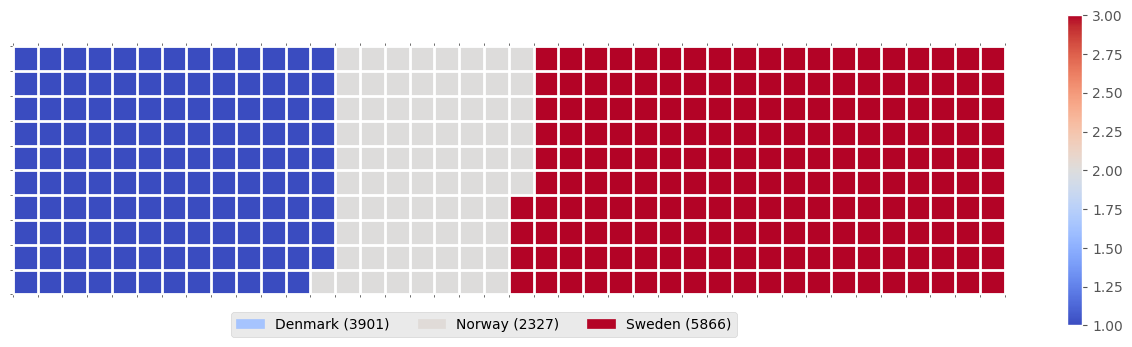

In [20]:
create_waffle_chart(categories, values, height, width, colormap)

In [21]:
# Gráficos de Regressão
import seaborn as sns

In [22]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

#Modifica os anos para o tipo float
df_tot.index = map(float, df_tot.index)

# Reseta o index
df_tot.reset_index(inplace=True)

#Renomeia as colunas
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

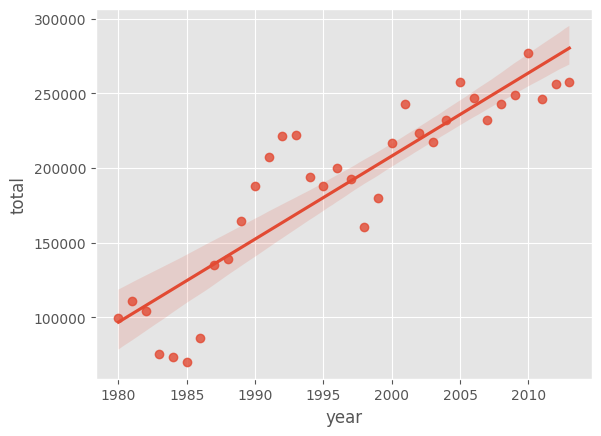

In [23]:
sns.regplot(x='year', y='total', data=df_tot)

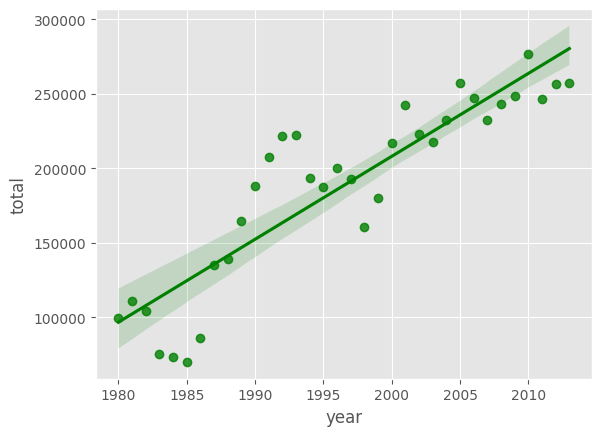

In [24]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

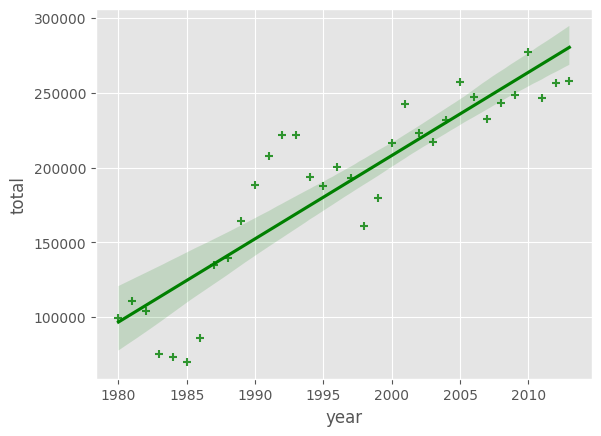

In [25]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

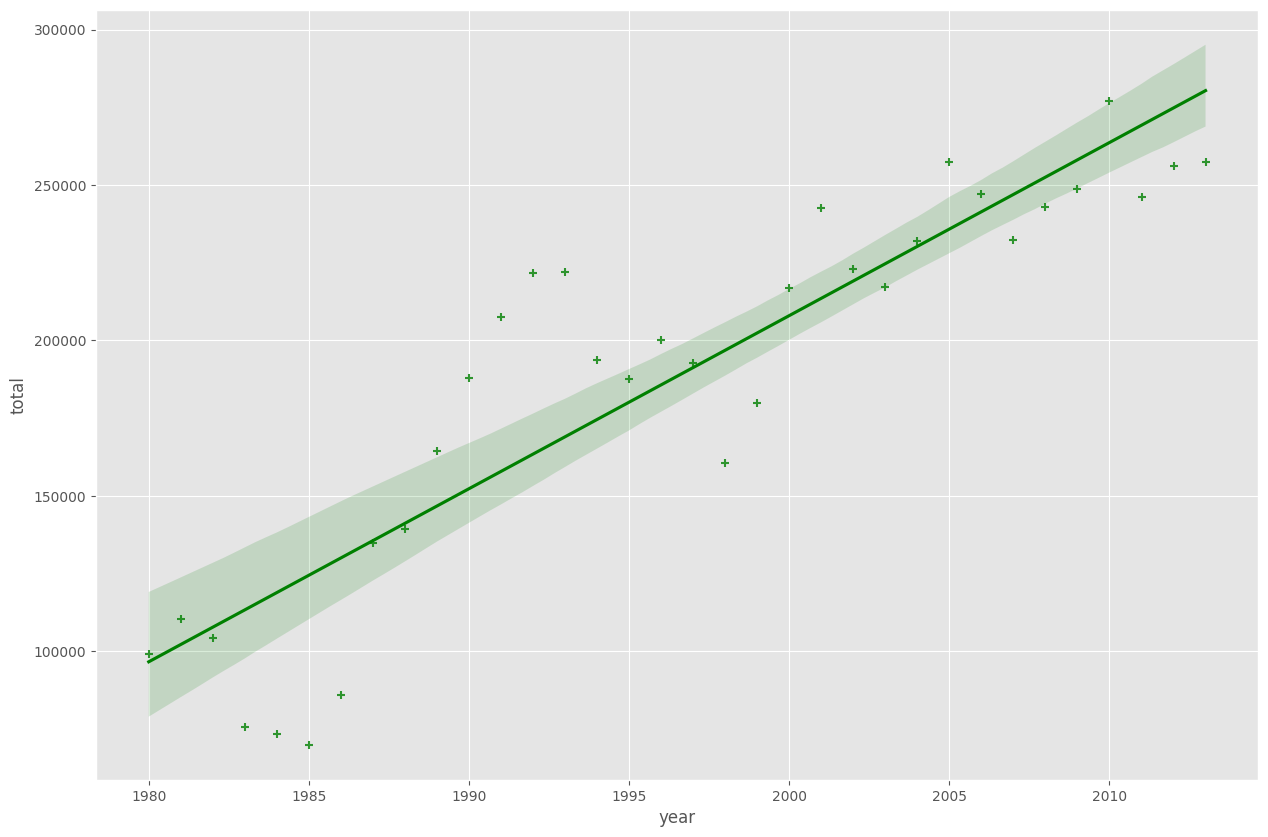

In [26]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

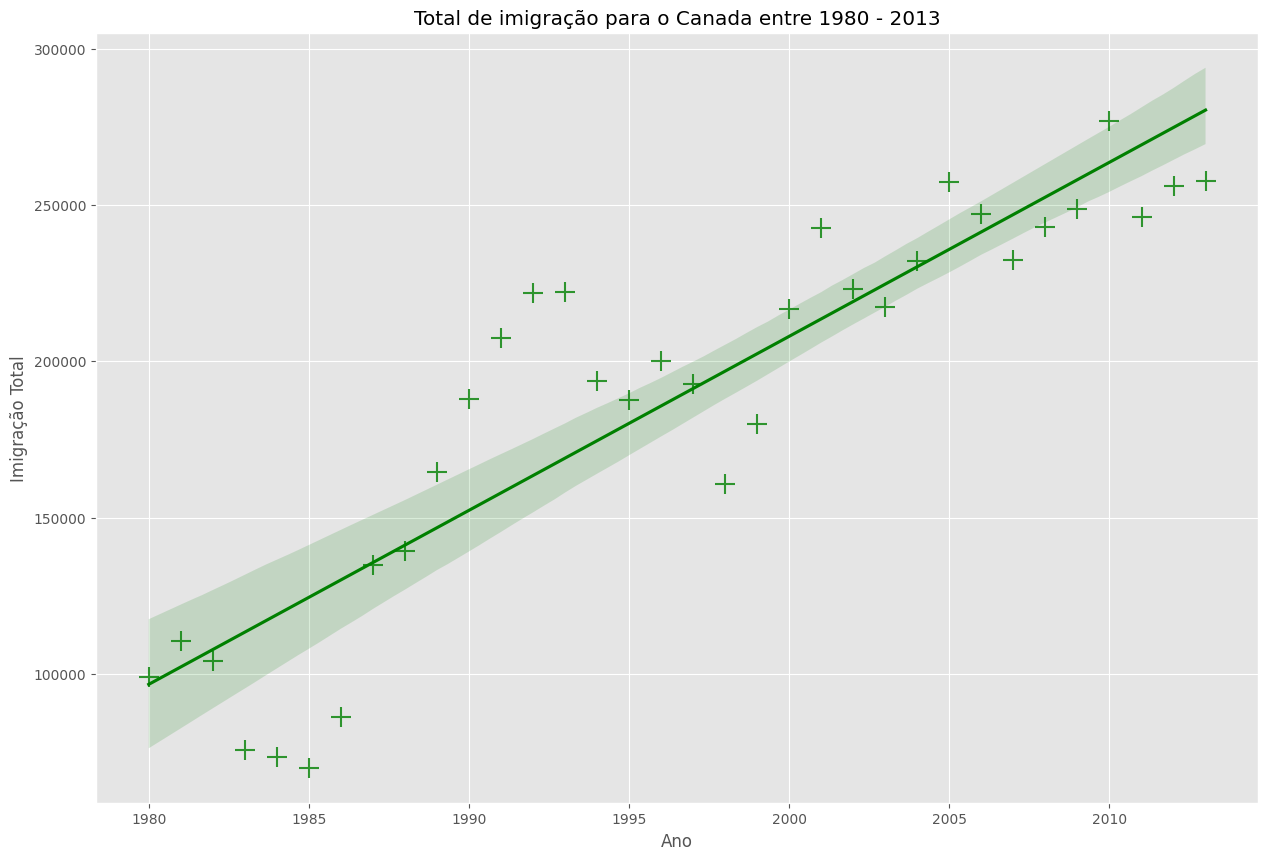

In [27]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Ano', ylabel='Imigração Total') # Adiciona labels para x e y
ax.set_title('Total de imigração para o Canada entre 1980 - 2013') # Adiciona um titulo
plt.show()

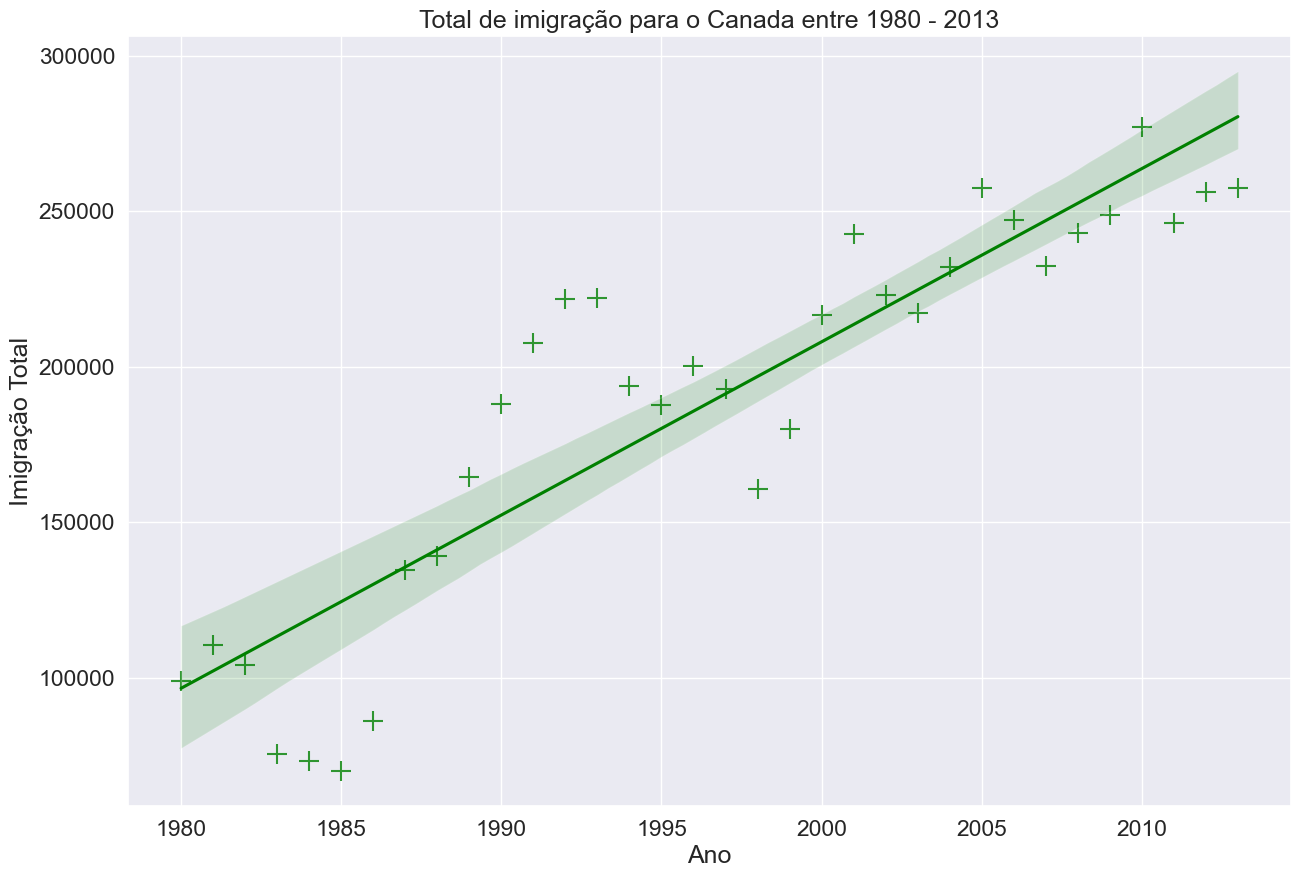

In [28]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Ano', ylabel='Imigração Total') # Adiciona labels para x e y
ax.set_title('Total de imigração para o Canada entre 1980 - 2013') # Adiciona um titulo
plt.show()

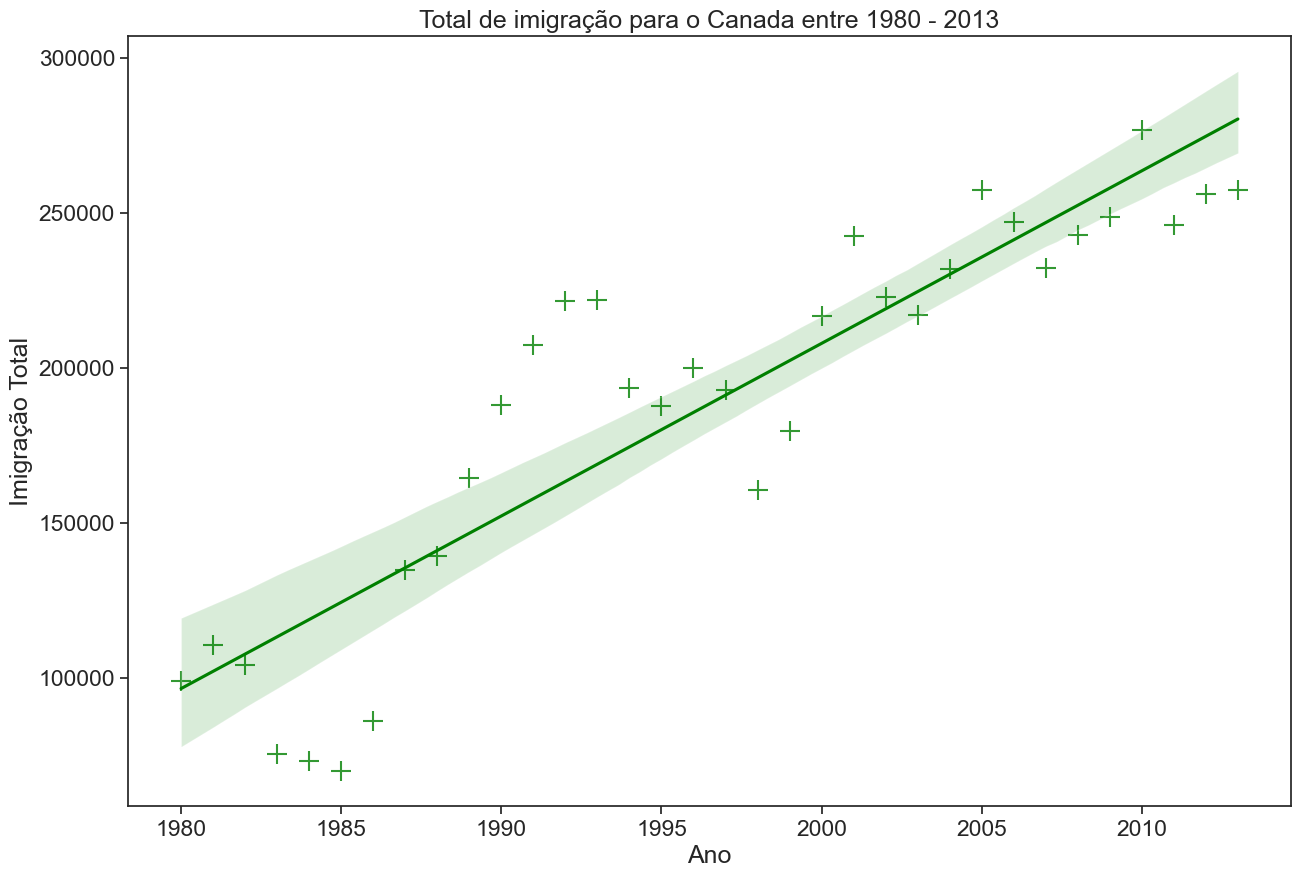

In [29]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('ticks') #Modifica o background para branco
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Ano', ylabel='Imigração Total') # Adiciona labels para x e y
ax.set_title('Total de imigração para o Canada entre 1980 - 2013') # Adiciona um titulo
plt.show()

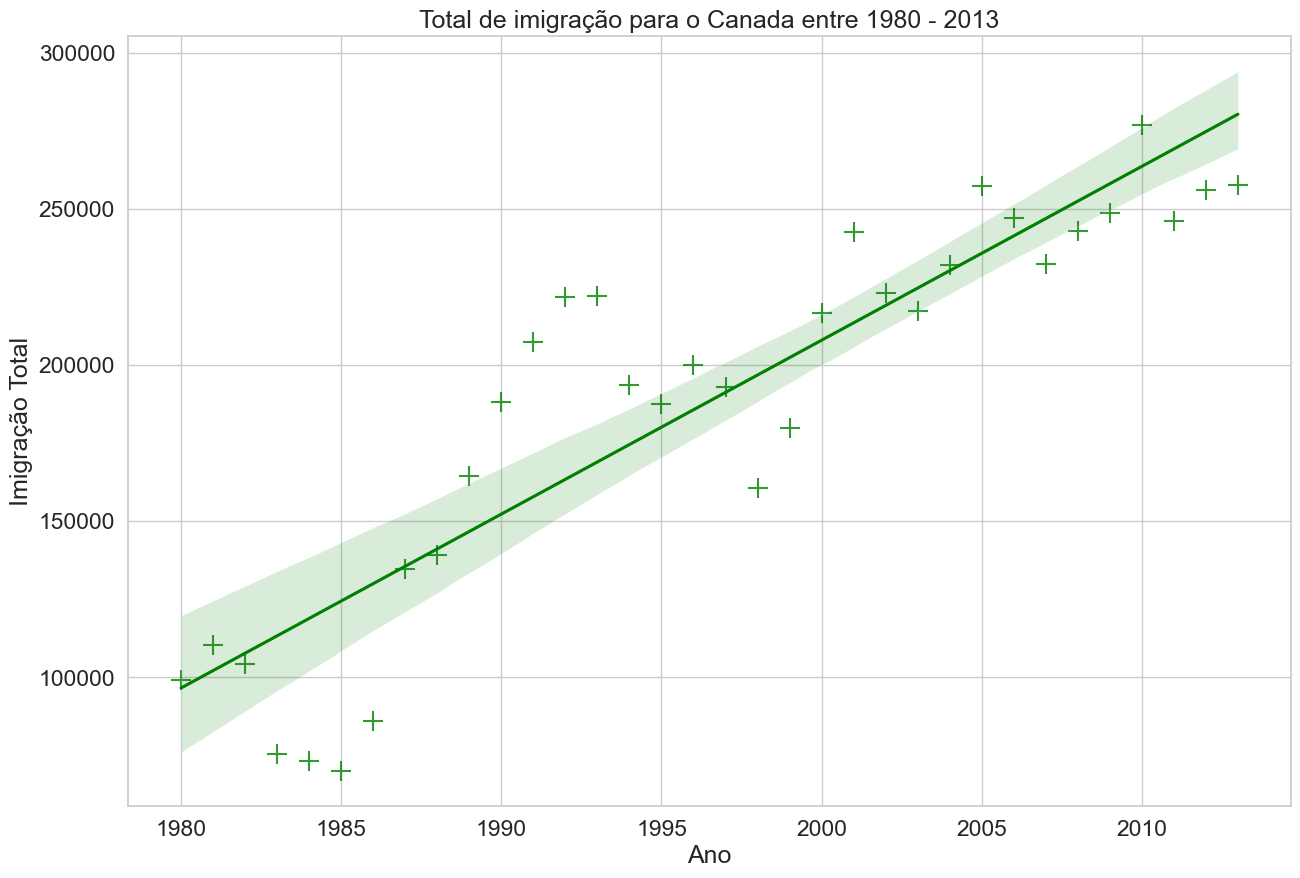

In [30]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Ano', ylabel='Imigração Total') # Adiciona labels para x e y
ax.set_title('Total de imigração para o Canada entre 1980 - 2013') # Adiciona um titulo
plt.show()